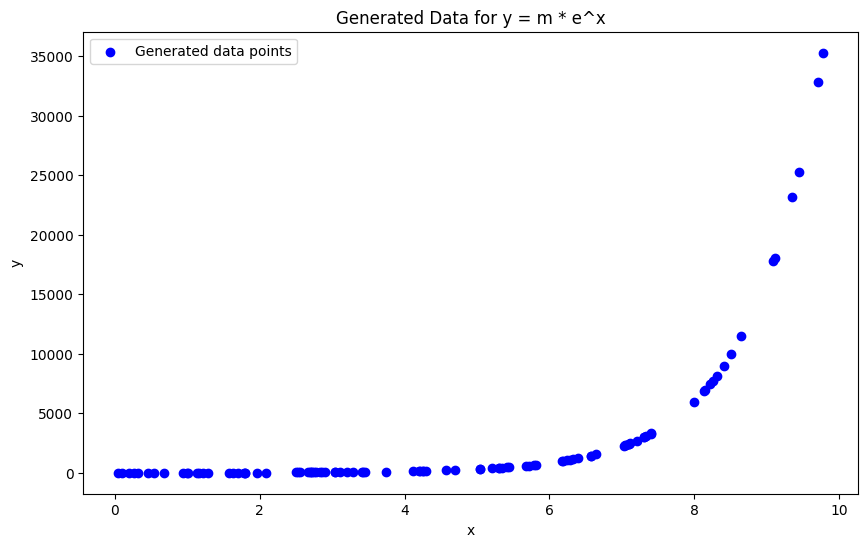

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
m = 2  # The multiplier in the equation y = m * e^x
num_samples = 100  # Number of samples to generate
x_min = 0  # Minimum value of x
x_max = 10  # Maximum value of x

# Generate random x values within the range [x_min, x_max]
x_values = np.random.uniform(x_min, x_max, num_samples)

# Compute corresponding y values using the equation y = m * e^x
y_values = m * np.exp(x_values)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', label='Generated data points')
plt.title('Generated Data for y = m * e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [5]:
import numpy as np
num_samples = 200  # Number of samples to generate
num_anomalies = 20
anomaly_indices = np.random.choice(range(num_samples//2, num_samples//2 + num_anomalies), num_anomalies, replace=False)

print(anomaly_indices)


x= np.random.uniform(0.1, 0.3, num_anomalies)

print(x)

[117 104 103 110 106 113 114 111 107 116 112 105 109 108 101 115 119 118
 100 102]
[0.27547461 0.24815372 0.23940315 0.24049682 0.17189823 0.15871837
 0.26187223 0.26202268 0.27341446 0.28264811 0.20226848 0.20030326
 0.25965904 0.22999279 0.24039338 0.25915853 0.27800107 0.16759903
 0.17511659 0.11879639]


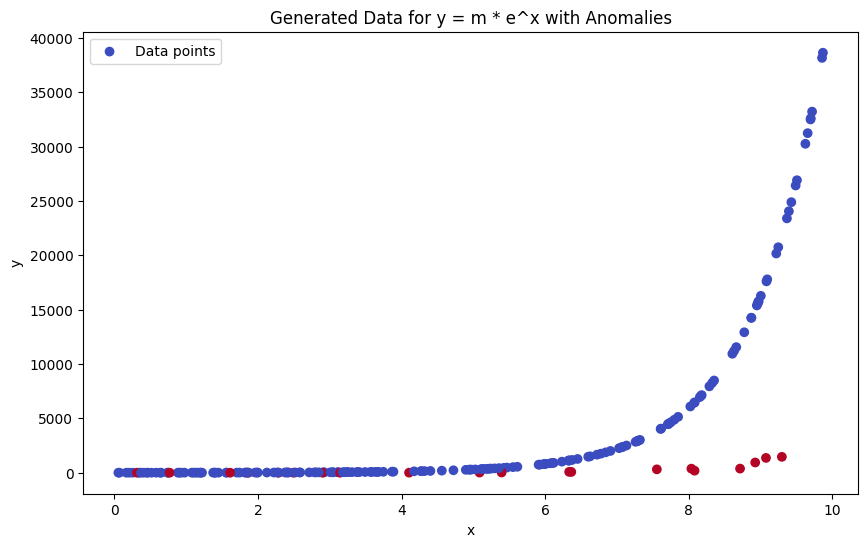

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       180
         1.0       1.00      0.60      0.75        20

    accuracy                           0.96       200
   macro avg       0.98      0.80      0.86       200
weighted avg       0.96      0.96      0.96       200

[[180   0]
 [  8  12]]
predicted values are : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


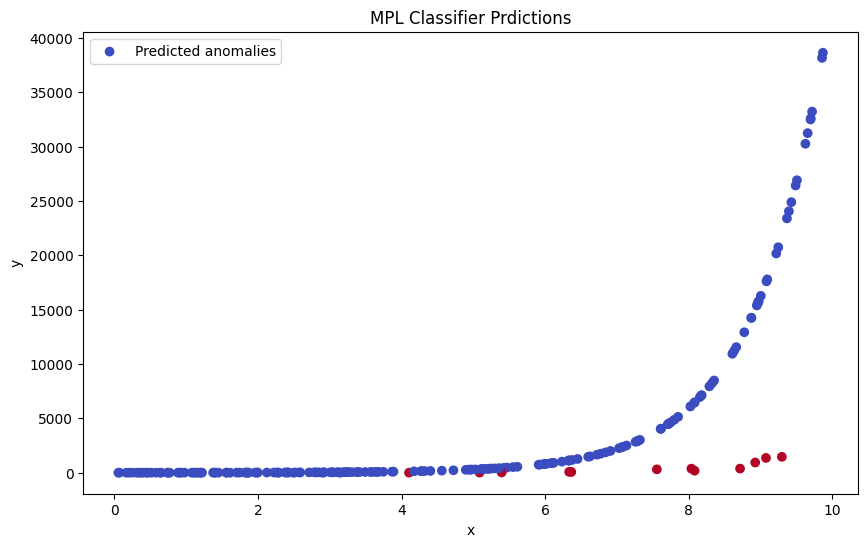

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Parameters
m = 2  # The multiplier in the equation y = m * e^x
num_samples = 200  # Number of samples to generate
num_anomalies = 20  # Number of anomalies to inject
x_min = 0  # Minimum value of x
x_max = 10  # Maximum value of x

# Generate random x values within the range [x_min, x_max]
np.random.seed(42)  # For reproducibility
x_values = np.random.uniform(x_min, x_max, num_samples)
y_values = m * np.exp(x_values)

# Inject anomalies in the middle of the data points
anomaly_indices = np.random.choice(range(num_samples//2, num_samples//2 + num_anomalies), num_anomalies, replace=False)
y_values[anomaly_indices] *= np.random.uniform(0.01, 0.09, num_anomalies)  # Inject anomalies by scaling down

# Create labels for the data: 0 for normal data, 1 for anomalies
labels = np.zeros(num_samples)
labels[anomaly_indices] = 1

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=labels, cmap='coolwarm', label='Data points')
plt.title('Generated Data for y = m * e^x with Anomalies')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Prepare the data for training
# Features: x_values and y_values
# Labels: 0 for normal data, 1 for anomalies
X = np.column_stack((x_values, y_values))
y = labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train an MPL classifier
mlp = MLPClassifier(hidden_layer_sizes=(500, 300), max_iter=1000, random_state=42)
mlp.fit(X_scaled, y)

# Predict and evaluate the model
y_pred = mlp.predict(X_scaled)
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

print(f"predicted values are : {y}")
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=y_pred, cmap='coolwarm', label='Predicted anomalies')
plt.title('MPL Classifier Prdictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#AutoEncoder NN for detected anomalies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Parameters
m = 2  # The multiplier in the equation y = m * e^x
num_samples = 200  # Number of samples to generate
num_anomalies = 20  # Number of anomalies to inject
x_min = 0  # Minimum value of x
x_max = 10  # Maximum value of x

# Generate random x values within the range [x_min, x_max]
np.random.seed(42)  # For reproducibility
x_values = np.random.uniform(x_min, x_max, num_samples)
y_values = m * np.exp(x_values)

# Inject anomalies in the middle of the data points
anomaly_indices = np.random.choice(range(num_samples//2, num_samples//2 + num_anomalies), num_anomalies, replace=False)
y_values[anomaly_indices] *= np.random.uniform(0.01, 0.9, num_anomalies)  # Inject anomalies by scaling down

# Create labels for the data: 0 for normal data, 1 for anomalies
labels = np.zeros(num_samples)
labels[anomaly_indices] = 1

# Prepare the data for training
# Features: x_values and y_values
# Labels: 0 for normal data, 1 for anomalies
X = np.column_stack((x_values, y_values))
y = labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_scaled, y, epochs=100, batch_size=10, shuffle=True, validation_split=0.2, verbose=1)

# Predict the reconstruction of the data
X_pred = autoencoder.predict(X_scaled)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

# Set a threshold for reconstruction error
threshold = np.percentile(reconstruction_error, 95)
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate the model
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

# Plot the data and predictions in two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data with anomalies
ax[0].scatter(x_values, y_values, c=labels, cmap='coolwarm', label='Data points')
ax[0].set_title('Generated Data for y = m * e^x with Anomalies')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

# Autoencoder predictions
ax[1].scatter(x_values, y_values, c=y_pred, cmap='coolwarm', label='Predicted anomalies')
ax[1].set_title('Autoencoder Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.tight_layout()
plt.show()


## LSTM approach ( for non temporal data )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             17152     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVecto  (None, 1, 32)             0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             24832     
                                                                 
 time_distributed (TimeDist  (None, 1, 2)              130       
 ributed)                                               

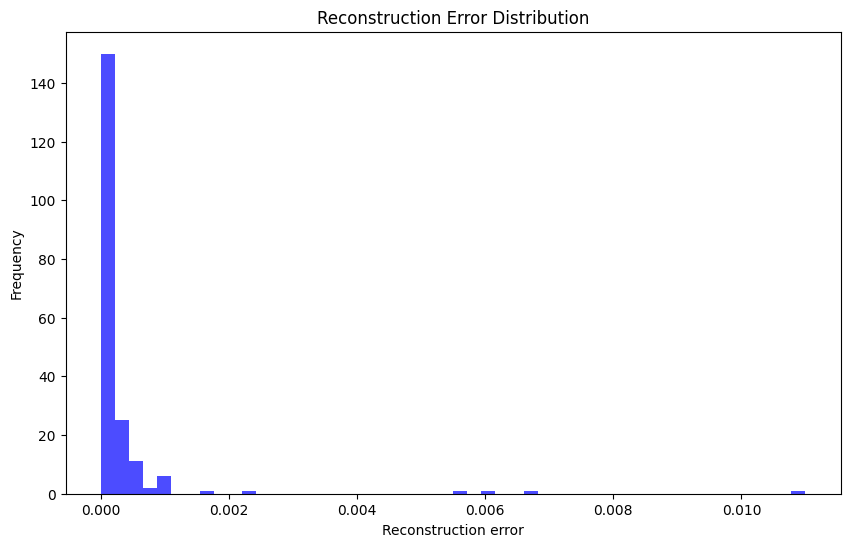

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95       180
         1.0       0.50      0.25      0.33        20

    accuracy                           0.90       200
   macro avg       0.71      0.61      0.64       200
weighted avg       0.88      0.90      0.88       200

[[175   5]
 [ 15   5]]


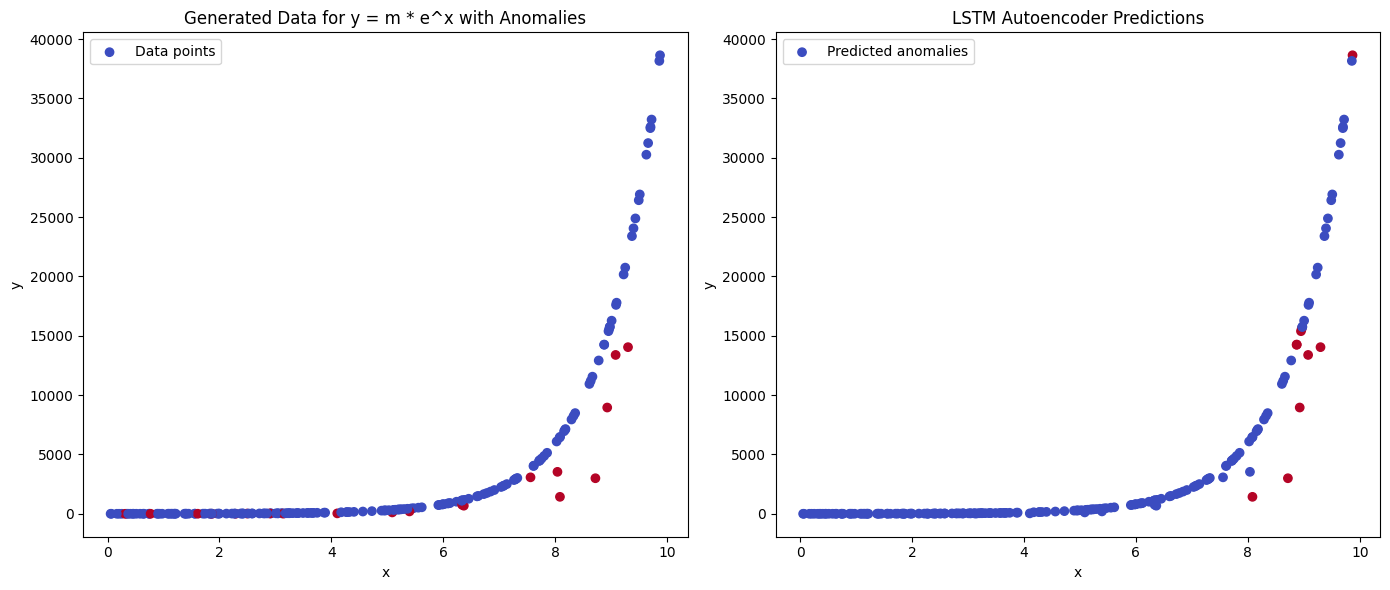

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed

# Parameters
m = 2  # The multiplier in the equation y = m * e^x
num_samples = 200  # Number of samples to generate
num_anomalies = 20  # Number of anomalies to inject
x_min = 0  # Minimum value of x
x_max = 10  # Maximum value of x

# Generate random x values within the range [x_min, x_max]
np.random.seed(42)  # For reproducibility
x_values = np.random.uniform(x_min, x_max, num_samples)
y_values = m * np.exp(x_values)

# Inject anomalies in the middle of the data points
anomaly_indices = np.random.choice(range(num_samples//2, num_samples//2 + num_anomalies), num_anomalies, replace=False)
y_values[anomaly_indices] *= np.random.uniform(0.01, 0.9, num_anomalies)  # Inject anomalies by scaling down

# Create labels for the data: 0 for normal data, 1 for anomalies
labels = np.zeros(num_samples)
labels[anomaly_indices] = 1

# Prepare the data for training
# Features: x_values and y_values
# Labels: 0 for normal data, 1 for anomalies
X = np.column_stack((x_values, y_values))
y = labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data to 3D for LSTM (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Build the LSTM autoencoder
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(RepeatVector(X_scaled.shape[1]))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(X_scaled.shape[2])))

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the LSTM autoencoder
model.fit(X_scaled, X_scaled, epochs=100, batch_size=10, shuffle=True, validation_split=0.2, verbose=1)

# Predict the reconstruction of the data
X_pred = model.predict(X_scaled)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.power(X_scaled - X_pred, 2), axis=(1, 2))

# Analyze the error distribution to set the threshold
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, color='blue', alpha=0.7)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction error')
plt.ylabel('Frequency')
plt.show()

# Set a threshold for reconstruction error
threshold = np.percentile(reconstruction_error, 95)  # 95th percentile
y_pred = (reconstruction_error > threshold).astype(int)

# Evaluate the model
print(classification_report(y, y_pred))
print(confusion_matrix(y, y_pred))

# Plot the data and predictions in two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original data with anomalies
ax[0].scatter(x_values, y_values, c=labels, cmap='coolwarm', label='Data points')
ax[0].set_title('Generated Data for y = m * e^x with Anomalies')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].legend()

# LSTM autoencoder predictions
ax[1].scatter(x_values, y_values, c=y_pred, cmap='coolwarm', label='Predicted anomalies')
ax[1].set_title('LSTM Autoencoder Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].legend()

plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Parameters
num_unique_values = 20  # Number of unique values for the new column
num_x_per_value = 9  # Number of different x values per unique value
m_min, m_max = 1, 3  # Range for random m values
a_min, a_max = 0.5, 1.5  # Range for random a values
x_min, x_max = 0, 10  # Range for x values
num_anomalies = 20  # Number of anomalies to inject

# Generate the dataset
np.random.seed(42)  # For reproducibility
unique_values = np.arange(num_unique_values)  # Unique values for the new column
x_values = np.random.uniform(x_min, x_max, num_unique_values * num_x_per_value)  # Random x values
m_values = np.random.uniform(m_min, m_max, num_unique_values)  # Random m values for each unique value
a_values = np.random.uniform(a_min, a_max, num_unique_values)  # Random a values for each unique value

# Calculate y values
y_values = np.zeros(num_unique_values * num_x_per_value)
for i in range(num_unique_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    y_values[start_idx:end_idx] = m_values[i] * np.exp(a_values[i] * x_values[start_idx:end_idx])

# Create labels for the data: 0 for normal data, 1 for anomalies
labels = np.zeros(num_unique_values * num_x_per_value)

# Inject anomalies in the middle of the data points
anomaly_indices = np.random.choice(range(num_unique_values * num_x_per_value // 2,
                                         num_unique_values * num_x_per_value // 2 + num_anomalies),
                                   num_anomalies, replace=False)
y_values[anomaly_indices] *= np.random.uniform(0.01, 0.9, num_anomalies)  # Inject anomalies by scaling down
labels[anomaly_indices] = 1

# Prepare the data for training
# Features: x_values, a_values, and y_values
# Labels: 0 for normal data, 1 for anomalies
new_column = np.repeat(unique_values, num_x_per_value)
X = np.column_stack((new_column, x_values, y_values))
y = labels


print(X)

[[0.00000000e+00 3.74540119e+00 1.21198432e+02]
 [0.00000000e+00 9.50714306e+00 8.73362332e+04]
 [0.00000000e+00 7.31993942e+00 7.18438297e+03]
 [0.00000000e+00 5.98658484e+00 1.56702124e+03]
 [0.00000000e+00 1.56018640e+00 9.99259883e+00]
 [0.00000000e+00 1.55994520e+00 9.98984665e+00]
 [0.00000000e+00 5.80836122e-01 3.26544382e+00]
 [0.00000000e+00 8.66176146e+00 3.32585831e+04]
 [0.00000000e+00 6.01115012e+00 1.61160542e+03]
 [1.00000000e+00 7.08072578e+00 7.67584834e+01]
 [1.00000000e+00 2.05844943e-01 1.38371410e+00]
 [1.00000000e+00 9.69909852e+00 3.54305691e+02]
 [1.00000000e+00 8.32442641e+00 1.58722779e+02]
 [1.00000000e+00 2.12339111e+00 4.24137119e+00]
 [1.00000000e+00 1.81824967e+00 3.54891280e+00]
 [1.00000000e+00 1.83404510e+00 3.58180923e+00]
 [1.00000000e+00 3.04242243e+00 7.25528041e+00]
 [1.00000000e+00 5.24756432e+00 2.63071572e+01]
 [2.00000000e+00 4.31945019e+00 4.96489002e+01]
 [2.00000000e+00 2.91229140e+00 1.95692524e+01]
 [2.00000000e+00 6.11852895e+00 1.632525

## Re-Testing MLP Classifier for anomaly detection

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       140
         1.0       1.00      0.30      0.46        20

    accuracy                           0.91       160
   macro avg       0.95      0.65      0.71       160
weighted avg       0.92      0.91      0.89       160

[[140   0]
 [ 14   6]]


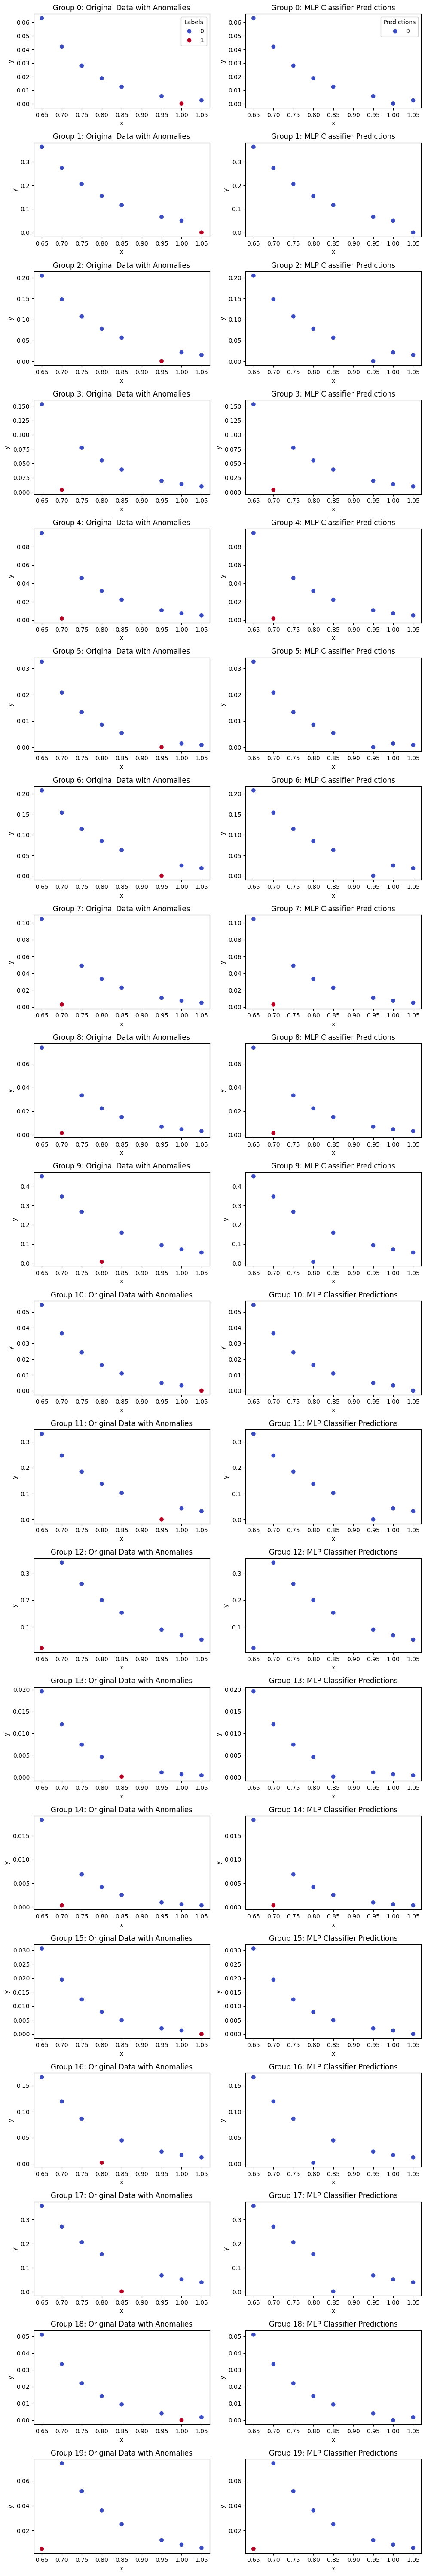

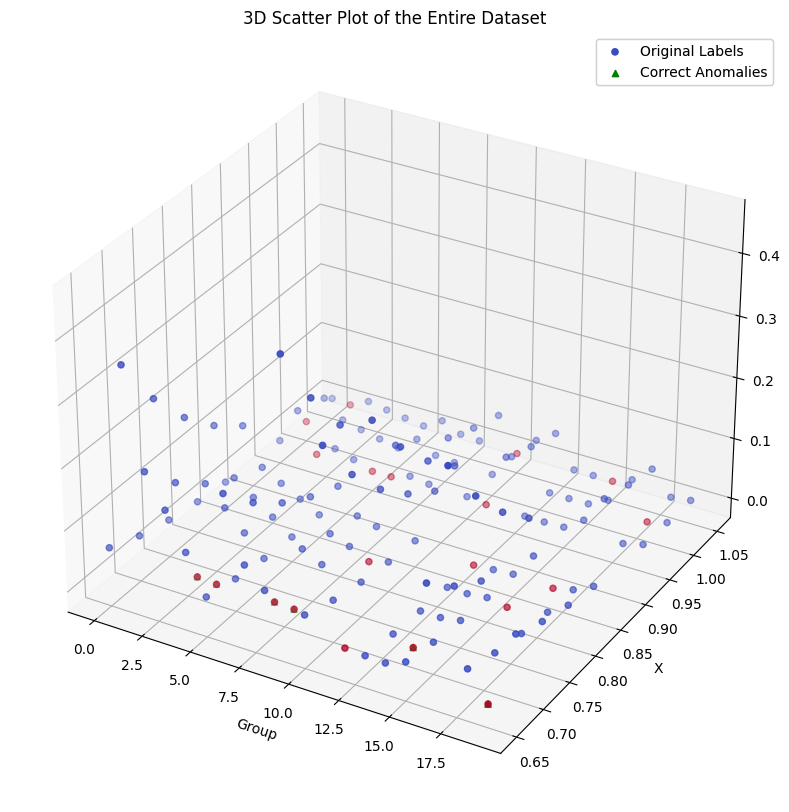

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D
# Parameters
num_unique_values = 20  # Number of unique values for the new column
num_x_per_value = 8  # Number of different x values per unique value (fixed x values given)
m_min, m_max = 10, 15  # Range for random m values
a_min, a_max = 5, 10  # Range for random a values (increased to create more curving nature)

# Fixed x values
x_values = np.array([0.65, 0.70, 0.75, 0.80, 0.85, 0.95, 1.0, 1.05])

# Generate the dataset
np.random.seed(42)
unique_values = np.arange(num_unique_values)  # Unique values for the new column
m_values = np.random.uniform(m_min, m_max, num_unique_values)  # Random m values for each unique value
a_values = np.random.uniform(a_min, a_max, num_unique_values)  # Random a values for each unique value

# Calculate y values (ensuring a decreasing curve)
y_values = np.zeros(num_unique_values * num_x_per_value)
for i in range(num_unique_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    y_values[start_idx:end_idx] = m_values[i] * np.exp(-a_values[i] * x_values)

# Create labels for the data: 0 for normal data, 1 for anomalies
labels = np.zeros(num_unique_values * num_x_per_value)

# Inject one anomaly in each group
for i in range(num_unique_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    anomaly_index = np.random.choice(range(start_idx, end_idx))
    y_values[anomaly_index] *= np.random.uniform(0.01, 0.05)  # Inject anomalies by scaling down
    labels[anomaly_index] = 1

# Prepare the data for training
# Features: new_column, x_values, and y_values
# Labels: 0 for normal data, 1 for anomalies
new_column = np.repeat(unique_values, num_x_per_value)
X = np.column_stack((new_column, np.tile(x_values, num_unique_values), y_values))
y = labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (if needed)
# For simplicity, we'll use the entire dataset for training and testing in this example
X_train, y_train = X_scaled, y

# Build the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Predict using the trained model
y_pred = mlp.predict(X_train)

# Evaluate the model
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

# Plot the data and predictions for each group level
fig, axes = plt.subplots(num_unique_values, 2, figsize=(10, num_unique_values * 3))

for i in range(num_unique_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    x_group = x_values
    y_group = y_values[start_idx:end_idx]
    labels_group = labels[start_idx:end_idx]
    y_pred_group = y_pred[start_idx:end_idx]

    # Original data with anomalies for each group
    scatter1 = axes[i, 0].scatter(x_group, y_group, c=labels_group, cmap='coolwarm')
    axes[i, 0].set_title(f'Group {i}: Original Data with Anomalies')
    axes[i, 0].set_xlabel('x')
    axes[i, 0].set_ylabel('y')
    if i == 0:
        legend1 = axes[i, 0].legend(*scatter1.legend_elements(), title="Labels")
        axes[i, 0].add_artist(legend1)

    # MLP classifier predictions for each group
    scatter2 = axes[i, 1].scatter(x_group, y_group, c=y_pred_group, cmap='coolwarm')
    axes[i, 1].set_title(f'Group {i}: MLP Classifier Predictions')
    axes[i, 1].set_xlabel('x')
    axes[i, 1].set_ylabel('y')
    if i == 0:
        legend2 = axes[i, 1].legend(*scatter2.legend_elements(), title="Predictions")
        axes[i, 1].add_artist(legend2)

plt.tight_layout()
plt.show()

# 3D plot of the entire dataset
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
correct_anomalies = (y == 1) & (y_pred == 1)
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='coolwarm', label='Original Labels',zorder=2)
scatter_correct = ax.scatter(X[correct_anomalies, 0], X[correct_anomalies, 1], X[correct_anomalies, 2],
                             c='green', marker='^', label='Correct Anomalies',zorder=1)

ax.set_xlabel('Group')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot of the Entire Dataset')

legend = ax.legend()
ax.add_artist(legend)
plt.show()

## Using MLP , first we traing on 1000x8 rows data and the use 20x8 ddata for prediction

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       140
         1.0       0.00      0.00      0.00        20

    accuracy                           0.88       160
   macro avg       0.44      0.50      0.47       160
weighted avg       0.77      0.88      0.82       160

[[140   0]
 [ 20   0]]


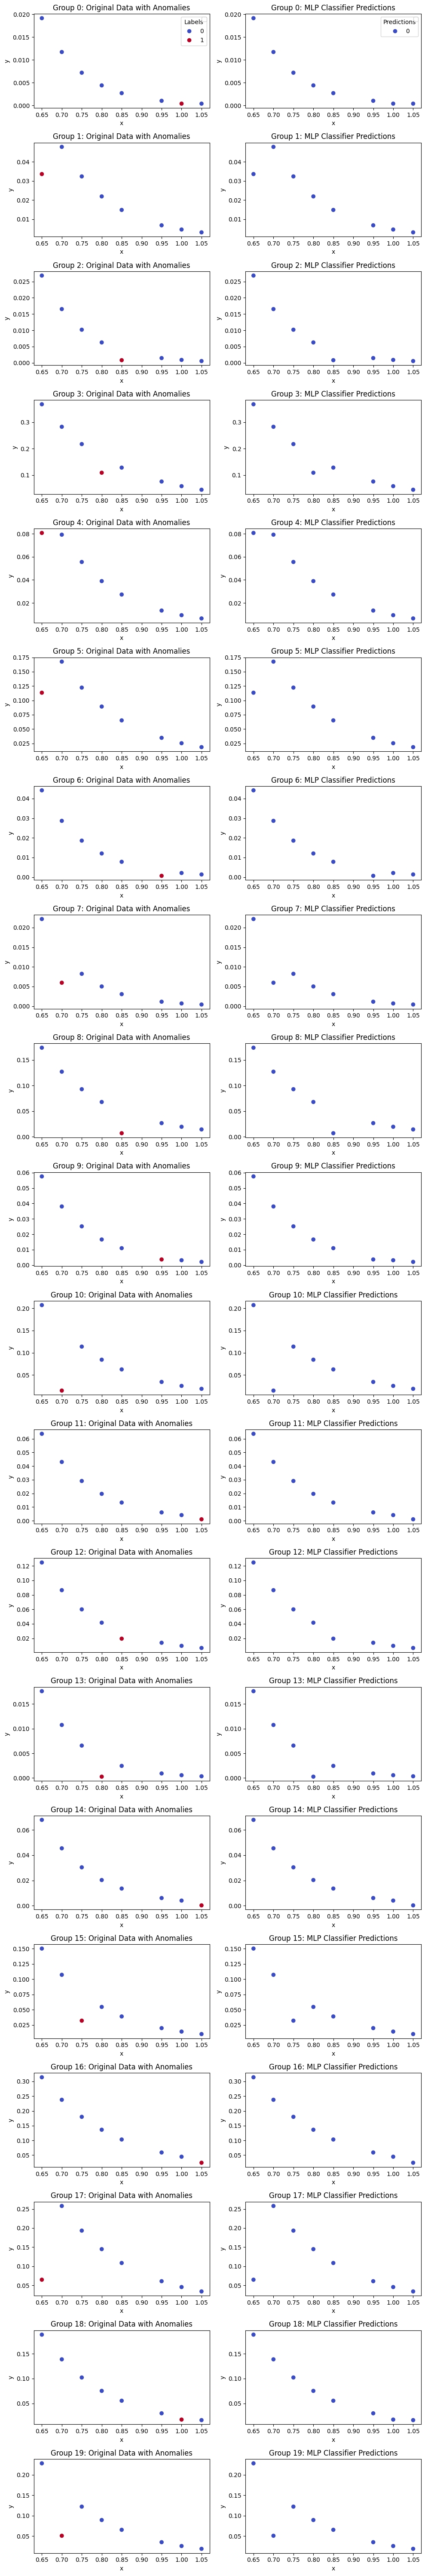

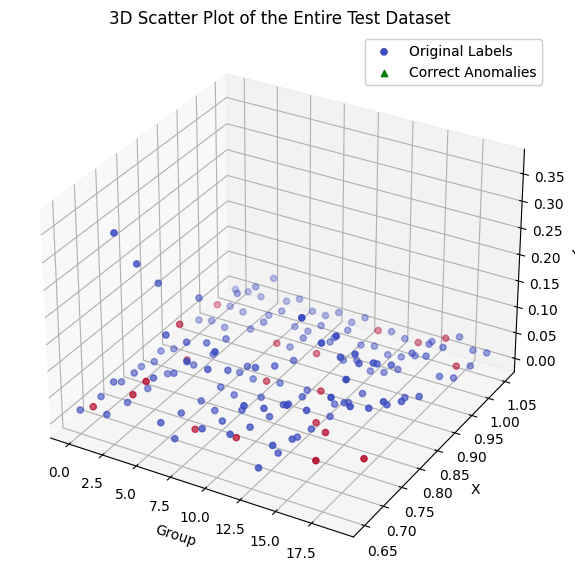

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

# Parameters
num_unique_train_values = 1000  # Number of unique values for the new column in the training dataset
num_unique_test_values = 20  # Number of unique values for the new column in the testing dataset
num_x_per_value = 8  # Number of different x values per unique value (fixed x values given)
m_min, m_max = 10, 15  # Range for random m values
a_min, a_max = 5, 10  # Range for random a values (increased to create more curving nature)

# Fixed x values
x_values = np.array([0.65, 0.70, 0.75, 0.80, 0.85, 0.95, 1.0, 1.05])

# Generate the training dataset
np.random.seed(42)  # For reproducibility
train_unique_values = np.arange(num_unique_train_values)  # Unique values for the new column in the training dataset
train_m_values = np.random.uniform(m_min, m_max, num_unique_train_values)  # Random m values for each unique value
train_a_values = np.random.uniform(a_min, a_max, num_unique_train_values)  # Random a values for each unique value

# Calculate y values (ensuring a decreasing curve) for training data
train_y_values = np.zeros(num_unique_train_values * num_x_per_value)
for i in range(num_unique_train_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    train_y_values[start_idx:end_idx] = train_m_values[i] * np.exp(-train_a_values[i] * x_values)

# Prepare the training data
train_new_column = np.repeat(train_unique_values, num_x_per_value)
X_train = np.column_stack((train_new_column, np.tile(x_values, num_unique_train_values), train_y_values))

# Standardize the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Generate the testing dataset
test_unique_values = np.arange(num_unique_test_values)  # Unique values for the new column in the testing dataset
test_m_values = np.random.uniform(m_min, m_max, num_unique_test_values)  # Random m values for each unique value
test_a_values = np.random.uniform(a_min, a_max, num_unique_test_values)  # Random a values for each unique value

# Calculate y values (ensuring a decreasing curve) for testing data
test_y_values = np.zeros(num_unique_test_values * num_x_per_value)
for i in range(num_unique_test_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    test_y_values[start_idx:end_idx] = test_m_values[i] * np.exp(-test_a_values[i] * x_values)

# Create labels for the test data: 0 for normal data, 1 for anomalies
test_labels = np.zeros(num_unique_test_values * num_x_per_value)

# Inject one anomaly in each group for testing data
for i in range(num_unique_test_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    anomaly_index = np.random.choice(range(start_idx, end_idx))
    test_y_values[anomaly_index] *= np.random.uniform(0.01, 0.9)  # Inject anomalies by scaling down
    test_labels[anomaly_index] = 1

# Prepare the testing data
test_new_column = np.repeat(test_unique_values, num_x_per_value)
X_test = np.column_stack((test_new_column, np.tile(x_values, num_unique_test_values), test_y_values))
y_test = test_labels

# Standardize the testing data
X_test_scaled = scaler.transform(X_test)

# Build the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train_scaled, np.zeros(X_train_scaled.shape[0]))  # Training with no anomalies

# Predict using the trained model
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot the data and predictions for each group level
fig, axes = plt.subplots(num_unique_test_values, 2, figsize=(10, num_unique_test_values * 3))

for i in range(num_unique_test_values):
    start_idx = i * num_x_per_value
    end_idx = start_idx + num_x_per_value
    x_group = x_values
    y_group = test_y_values[start_idx:end_idx]
    labels_group = test_labels[start_idx:end_idx]
    y_pred_group = y_pred[start_idx:end_idx]

    # Original data with anomalies for each group
    scatter1 = axes[i, 0].scatter(x_group, y_group, c=labels_group, cmap='coolwarm', zorder=1)
    # scatter_correct = axes[i, 0].scatter(x_group[labels_group == 1], y_group[labels_group == 1],
    #                                      c='green', marker='^', label='Correct Anomalies', zorder=2)
    axes[i, 0].set_title(f'Group {i}: Original Data with Anomalies')
    axes[i, 0].set_xlabel('x')
    axes[i, 0].set_ylabel('y')
    if i == 0:
        legend1 = axes[i, 0].legend(*scatter1.legend_elements(), title="Labels")
        axes[i, 0].add_artist(legend1)
        axes[i, 0].legend(loc='upper right')

    # MLP classifier predictions for each group
    scatter2 = axes[i, 1].scatter(x_group, y_group, c=y_pred_group, cmap='coolwarm', zorder=1)
    # scatter_correct_pred = axes[i, 1].scatter(x_group[y_pred_group == 1], y_group[y_pred_group == 1],
    #                                           c='green', marker='^', label='Correct Predictions', zorder=2)
    axes[i, 1].set_title(f'Group {i}: MLP Classifier Predictions')
    axes[i, 1].set_xlabel('x')
    axes[i, 1].set_ylabel('y')
    if i == 0:
        legend2 = axes[i, 1].legend(*scatter2.legend_elements(), title="Predictions")
        axes[i, 1].add_artist(legend2)
        axes[i, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()

# 3D plot of the entire test dataset
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=test_labels, cmap='coolwarm', label='Original Labels', zorder=1)
correct_anomalies = (y_test == 1) & (y_pred == 1)
scatter_correct = ax.scatter(X_test[correct_anomalies, 0], X_test[correct_anomalies, 1], X_test[correct_anomalies, 2],
                             c='green', marker='^', label='Correct Anomalies', zorder=2)

ax.set_xlabel('Group')
ax.set_ylabel('X')
ax.set_zlabel('Y')
ax.set_title('3D Scatter Plot of the Entire Test Dataset')

legend = ax.legend()
ax.add_artist(legend)

plt.show()
